In [7]:
from netCDF4 import Dataset
import numpy as np

In [8]:
fh = Dataset("data_march.nc", mode='r')
for var in fh.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (98,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (80,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 level(level)
    long_name: level
    units: m
unlimited dimensions: 
current shape = (4,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: ANALYSIS time from 20200301
    units: hours
unlimited dimensions: time
current shape = (744,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 pm10_conc(time, level, latitude, longitude)
    _FillValue: -999.0
    species: PM10 Aerosol
   

<ipython-input-8-a7689b1fafb9>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(var)


In [9]:
lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]
pm10 = fh.variables['pm10_conc'][0,1,:,:]
alldata=[fh['pm10_conc'][t,0,:,:] for t in range(fh['time'].shape[0])]

In [10]:
fh.close()

In [11]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature


import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import datetime
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['animation.embed_limit'] = 2**128
mpl.rc('font', size=16) 

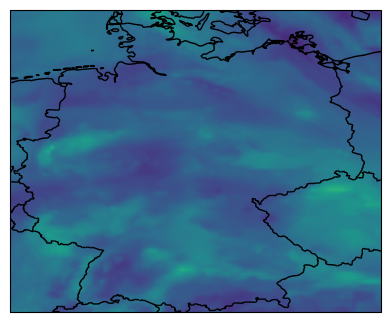

In [12]:
#https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html
fig, ax = plt.subplots(1,1,dpi=100) 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.coastlines()
vmin=0
vmax=35
cf=plt.contourf(lons, lats, alldata[0],levels=64,transform=ccrs.PlateCarree(),vmin=vmin, vmax=vmax )

plt.colorbar()
def animate(i):
    data=alldata[i]#ds['co_conc'][i,0,:,:]
    plt.clf()
    print(i/length*100,end="\r")
    #cf.set_array(data)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, linestyle='-')
    ax.coastlines()
    plt.contourf(lons, lats, data,levels=64,transform=ccrs.PlateCarree(),vmin=vmin, vmax=vmax )
    #fig.suptitle(f"PM2.5 Elemental Carbon from Anthropogenic Fossil Fuels \n Cut at:{vmax}, elevation:0\n Zeit:{time[i]}")
    #plt.draw()
length=24*3
anim = animation.FuncAnimation(fig, animate, frames=length, repeat = False)
HTML(anim.to_html5_video())

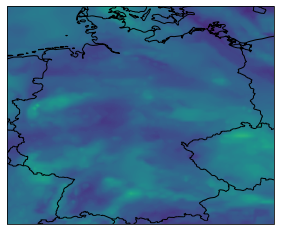

In [13]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1, metadata=dict(artist='Moin'))
anim.save('de24_3.mp4', writer=writer)

In [14]:
im.set_array(fh.variables['pm10_conc'][100,1,:,:])
plt.show()

NameError: name 'im' is not defined